<a href="https://colab.research.google.com/github/williamvinct/credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#dataset from kaggle.com

df = pd.read_csv('/content/drive/My Drive/ColabNotebooks/DataSample/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

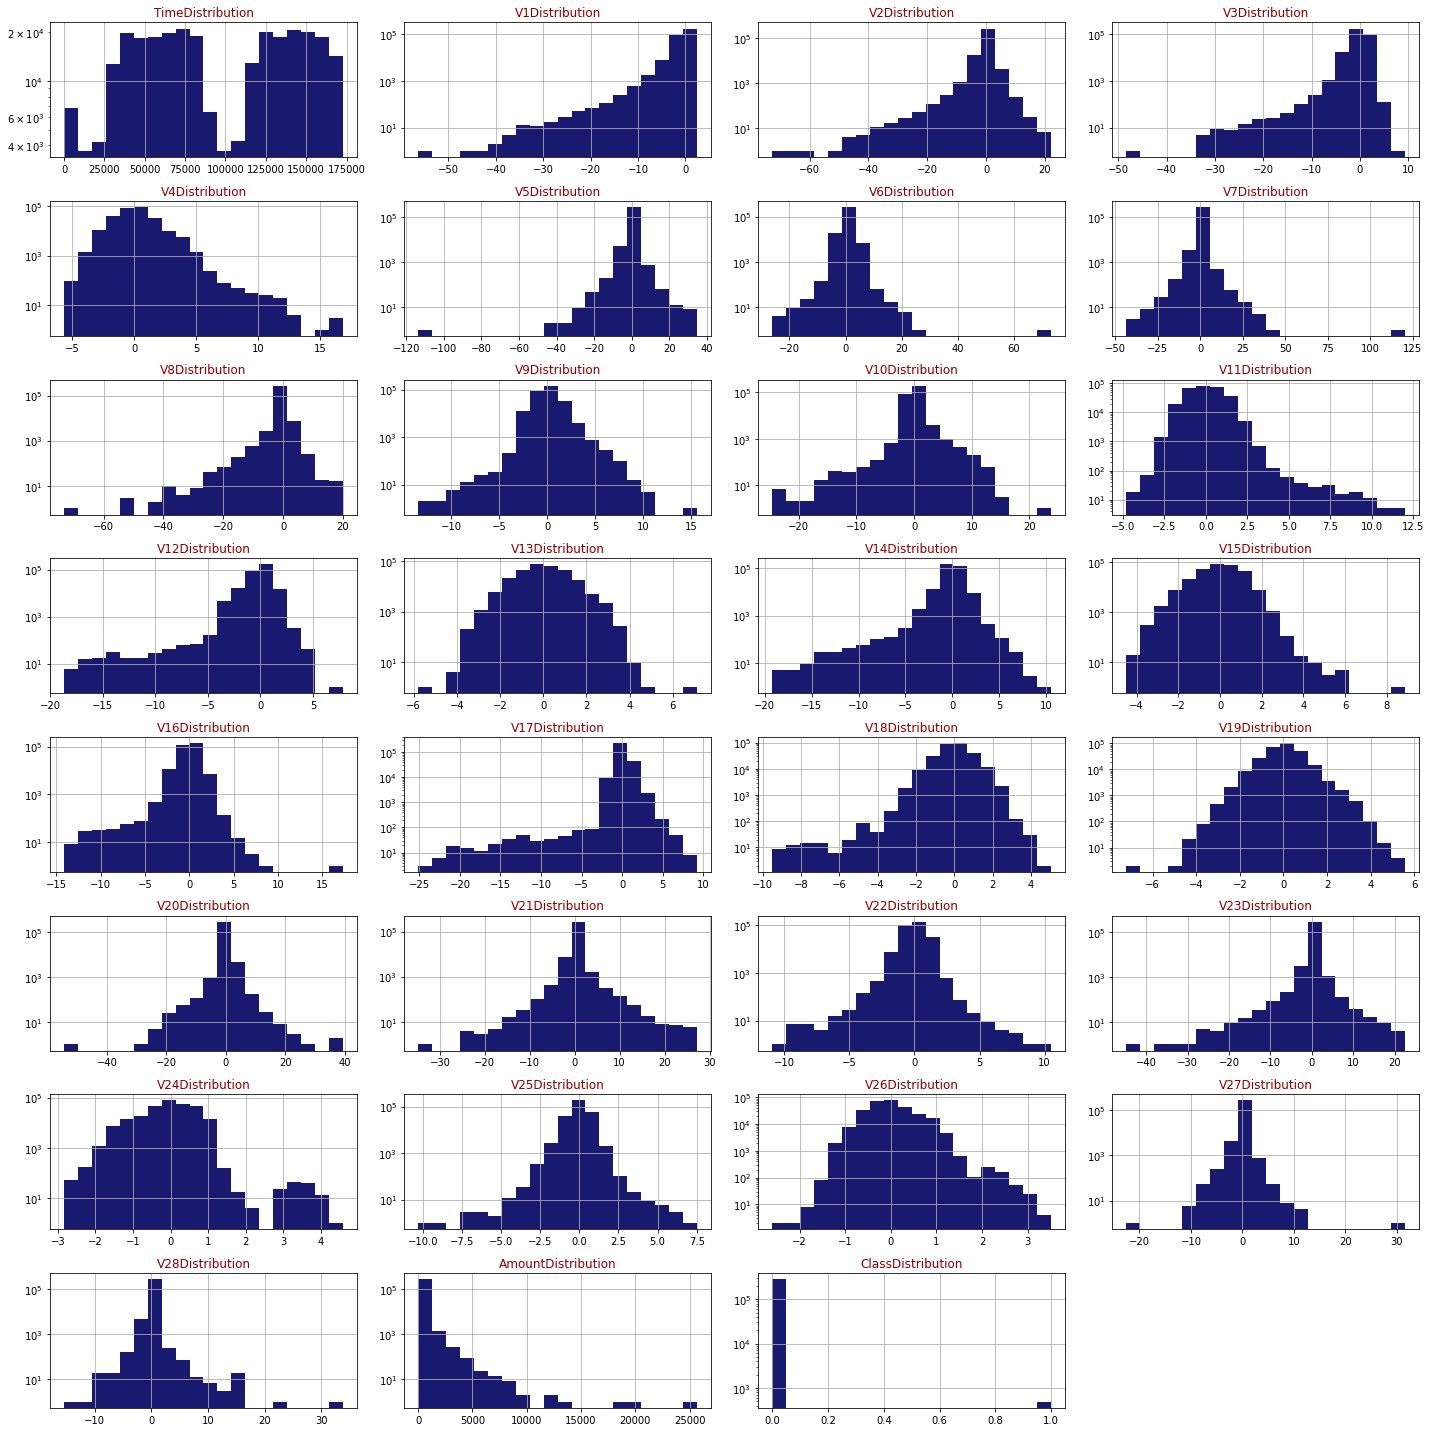

In [6]:
def hist(dataframe, features, rows, cols) :
  fig = plt.figure(figsize =(20,20))
  for i, feature in enumerate(features) :
    ax = fig.add_subplot(rows,cols,i+1)
    dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    ax.set_title(feature+ "Distribution", color="DarkRed")
    ax.set_yscale('log')
  fig.tight_layout()
  plt.show()
hist(df,df.columns,8,4)


In [7]:
X = df.iloc[:, :-1]
y = df['Class']

**Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [10]:
model = LogisticRegression()
grid = {'C' : 10.0 **np.arange(-2,3), 'penalty' : ['l1','l2']}
cv = KFold(n_splits=5, random_state=None, shuffle=False)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [12]:
clf = GridSearchCV(model, grid, cv = cv, n_jobs=-1, scoring='f1_macro' )
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pack

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [13]:
y_pred = clf.predict(X_test)

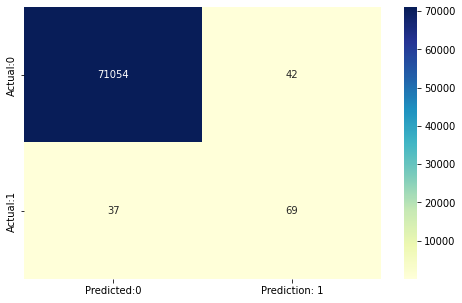

In [14]:
cm = confusion_matrix(y_pred, y_test)
conf_matrix = pd.DataFrame( data = cm, columns=['Predicted:0', 'Prediction: 1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [15]:
accuracy_score(y_pred,y_test)

0.9988904806044774

In [16]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71096
           1       0.62      0.65      0.64       106

    accuracy                           1.00     71202
   macro avg       0.81      0.83      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [17]:
2*0.72*0.74/(0.74+0.72)

0.72986301369863

**Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [19]:
y_pred = classifier.predict(X_test)

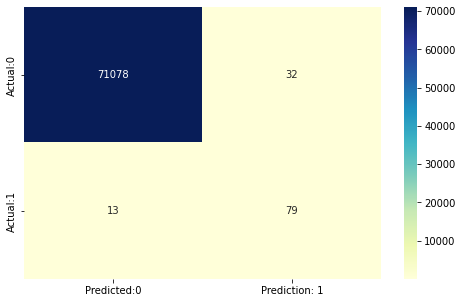

In [20]:
cm = confusion_matrix(y_pred, y_test)
conf_matrix = pd.DataFrame( data = cm, columns=['Predicted:0', 'Prediction: 1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
accuracy_score(y_pred,y_test)

0.9993679952810315

In [22]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71110
           1       0.71      0.86      0.78        92

    accuracy                           1.00     71202
   macro avg       0.86      0.93      0.89     71202
weighted avg       1.00      1.00      1.00     71202



**Performing Under Sampling : NearMiss**

Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples

*   NearMiss-1 : Majority class examples with minimum average distance to three closest minority class examples 
*   NearMiss-2 : Majority class examples with minimum average distance to three furthest minority class examples
*   NearMiss-3 : Majority class examples with minimum distance to each minority class example










In [23]:
from collections import Counter

Counter(y_train)

Counter({0: 213224, 1: 381})

In [28]:
from imblearn.under_sampling import NearMiss
ns = NearMiss(version=1, n_neighbors=3)

X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

print(f"y_train before resample {Counter(y_train)}")
print(f"y_train after resample {Counter(y_train_ns)}")

y_train before resample Counter({0: 213224, 1: 381})
y_train after resample Counter({0: 381, 1: 381})


In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [30]:
y_pred = classifier.predict(X_test)

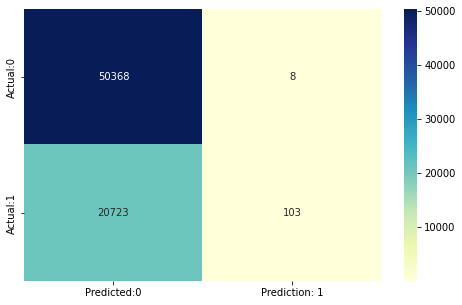

In [31]:
cm = confusion_matrix(y_pred, y_test)
conf_matrix = pd.DataFrame( data = cm, columns=['Predicted:0', 'Prediction: 1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [32]:
accuracy_score(y_pred,y_test)

0.7088424482458358

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     50376
           1       0.93      0.00      0.01     20826

    accuracy                           0.71     71202
   macro avg       0.82      0.50      0.42     71202
weighted avg       0.77      0.71      0.59     71202



**Catboost : overfit detection**

In [34]:
catboost = df.dropna()

In [41]:
features = df.iloc[:, :-1]
features = [feat for feat in list(catboost) if feat != 'Class']
features
card_categories = np.where(catboost[features].dtypes != np.float)[0]
card_categories

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


array([], dtype=int64)

In [43]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 88 kB/s 


In [45]:
SEED = 1234

from catboost import CatBoostClassifier

params = {'iterations':5000,
        'learning_rate':0.01, #use 0.01 - 0.08 to create a better model
        'cat_features':card_categories,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': SEED
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6654688	best: 0.6654688 (0)	total: 189ms	remaining: 15m 43s
200:	test: 0.9492566	best: 0.9563222 (47)	total: 22.5s	remaining: 8m 57s
400:	test: 0.9603373	best: 0.9603437 (399)	total: 31.2s	remaining: 5m 58s
600:	test: 0.9654112	best: 0.9654678 (596)	total: 40s	remaining: 4m 52s
800:	test: 0.9650542	best: 0.9664313 (690)	total: 49s	remaining: 4m 16s
1000:	test: 0.9640951	best: 0.9664313 (690)	total: 58.3s	remaining: 3m 52s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9664313003
bestIteration = 690

Shrink model to first 691 iterations.


In [46]:
!pip install ada-boost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [48]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [49]:
clf.fit(df[predictors],df['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [50]:
y_pred = clf.predict(df[predictors])

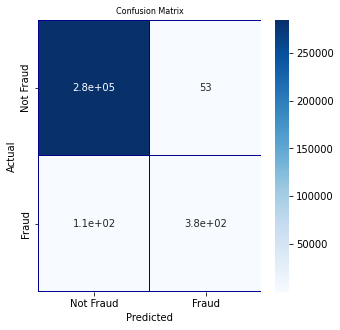

In [51]:
cm = pd.crosstab(df[target].values, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=8)
plt.show()

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
y_pred = cat_model.predict(X_test)

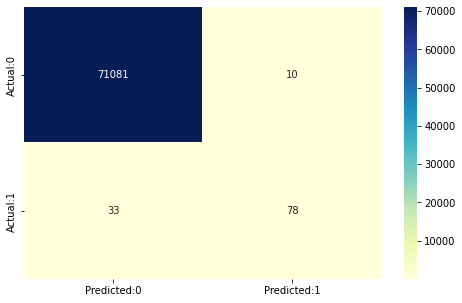

In [54]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

**SMOTE Analysis**

In [55]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from imblearn.combine import SMOTETomek

In [ ]:
os=SMOTETomek(random_state=42)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))